Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
__________________________________________________

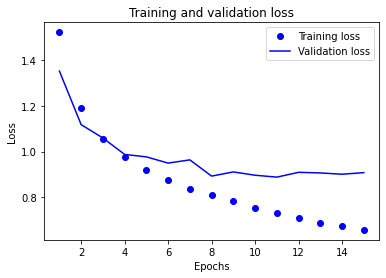

In [5]:
#7.Cifar10_CNN

#載入cifar10
from keras.datasets import cifar10 

#布置好訓練跟測試資料
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

#正規化把值變成0~1之間才不會有大小差太多的問題(除255是因為每個RGB都是0~255之間)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#進行one_hot encoding因為第一類跟第二類的1跟2沒大小分別
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

"""## Model Definition"""

#建立模型
from keras.models import Sequential
model = Sequential()

#設計模型
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#因為把size切成(3, 3)就能找到特爭執所以就這麼設計了
#以下每個空行分別代表一層
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

model.add(MaxPool2D())

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

"""## Fitting"""

history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

#劃出數據圖表
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

11493376/11490434 [==============================] - 1s 0us/step
Compression factor: 24.5
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_____

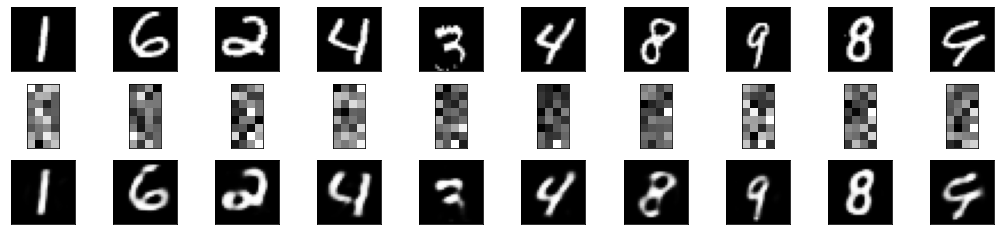

In [2]:
#8.MNIST_Autoencoder

#手寫數字辨識CODE首先同上先載入會用到的軟件
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

# 把訓練跟測試資料放進來
(x_train, _), (x_test, _) = mnist.load_data()

#正規化把值變成0~1之間才不會有大小差太多的問題
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value
x_train.shape, x_test.shape
# ((60000, 28, 28), (10000, 28, 28))=>60000筆28*28的訓練跟10000筆28*28的測試資料
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)
# ((60000, 784), (10000, 784))
# input dimension = 784=>為度(28*28)
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

#底下程式碼是把低維度的圖片升維還原
autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

TensorFlow is already loaded. Please restart the runtime to change versions.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2658 - val_loss: 0.1912
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1741 - val_loss: 0.1635
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1571 - val_loss: 0.1524
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1504 - val_loss: 0.1467
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1452 - val_loss: 0.1422
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1409 - val_loss: 0.1379
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1377 - val_loss: 0.1356
Epoch 8/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1354 - val_loss: 0.1339
Epoch 9/20
60000/60000 [=========

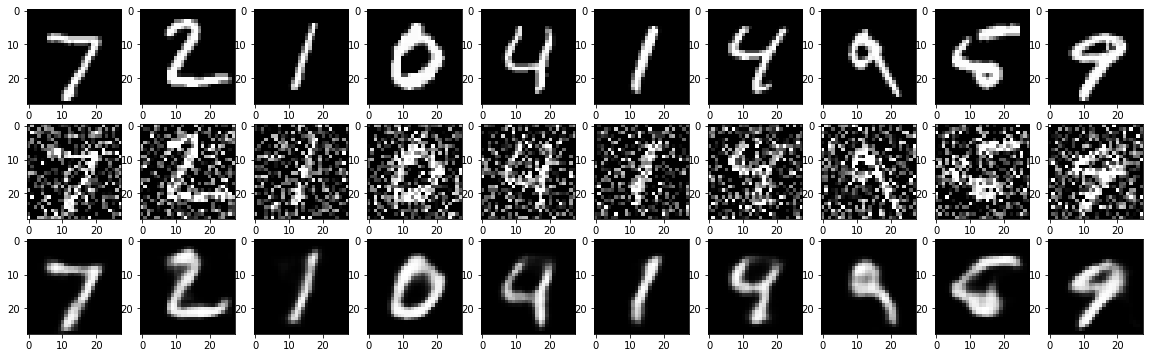

In [3]:
#8_1_MNIST_Autoencoder_Denoise
# 使用1.x版本的tensorflow
%tensorflow_version 1.x

#把會用的軟件加入近來
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#布置好訓練跟測試資料
(x_train, _), (x_test, _) = mnist.load_data()
#正規化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#陣列重塑形狀和調整大小
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))   
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))   

#加入雜訊
noise_factor = 0.5
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)  
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#以下開始還原加入雜訊後的圖片
#autoencoder模型建立
input_img = Input(shape=(28, 28, 1))   
    
#encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same', name='encoder')(x)   
#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 用 Model 來搭建模型，輸入為圖片，輸出是解碼的結果
autoencoder = Model(input_img, x)  
    
# 編譯模型，optimizer 使用 adam，loss 使用 binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 訓練 Autoencoder ，輸入是加入雜訊的圖片，輸出是原始圖片
autoencoder.fit(x_train_noisy, x_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test))

#將有雜訊的測試影像丟入訓練好的模型進行訓練
denoised_images = autoencoder.predict(x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2], 1))

#繪製圖形
plt.figure(figsize=(20, 6))

#劃出前10張圖片的三個狀態(原本圖片,雜訊圖片,還原結果)
for i in range(10):
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax = plt.subplot(3, 10, i+21)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
plt.show()

In [4]:
#9.MNIST_RNN
#用RNN來做分析
from keras.datasets import mnist
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
from keras.models import Sequential

#LSTM的參數設定
nb_lstm_outputs = 30  
nb_time_steps = 28  
nb_input_vector = 28 

#載入訓練及測試資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
 
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#建立模型(這邊就一層而已第二層就輸出了)
model = Sequential()
model.add(LSTM(units=nb_lstm_outputs, input_shape=(nb_time_steps, nb_input_vector)))
model.add(Dense(10, activation='softmax'))

#compile:loss, optimizer, metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#train: epcoch, batch_size
model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1)

model.summary()

score = model.evaluate(x_test, y_test,batch_size=128, verbose=1)
print(score)

#可以看到明明只有一層的RNN花費的時間大概是CNN好幾層的10倍((所以LSTM是有錢人玩的東西))

Epoch 1/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.9533 - accuracy: 0.7012
Epoch 2/20
60000/60000 [==============================] - 26s 432us/step - loss: 0.2937 - accuracy: 0.9151
Epoch 3/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.2069 - accuracy: 0.9393
Epoch 4/20
60000/60000 [==============================] - 25s 414us/step - loss: 0.1641 - accuracy: 0.9523
Epoch 5/20
60000/60000 [==============================] - 25s 410us/step - loss: 0.1419 - accuracy: 0.9582
Epoch 6/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.1261 - accuracy: 0.9629
Epoch 7/20
60000/60000 [==============================] - 25s 415us/step - loss: 0.1155 - accuracy: 0.9660
Epoch 8/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.1050 - accuracy: 0.9684
Epoch 9/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.0985 - accuracy: 0.9709
Epoch 10/20
60000/60000 [============